# Introduction to GPT-4o
GPT-4o ("o" for "omni") is designed to handle a combination of text, audio, and video inputs, and can generate outputs in text, audio, and image formats.

### Background
Before GPT-4o, users could interact with ChatGPT using Voice Mode, which operated with three separate models. GPT-4o will integrate these capabilities into a single model that's trained across text, vision, and audio. This unified approach ensures that all inputs—whether text, visual, or auditory—are processed cohesively by the same neural network.

### Current API Capabilities
Currently, the API supports `{text, image}` inputs only, with `{text}` outputs, the same modalities as `gpt-4-turbo`. Additional modalities, including audio, will be introduced soon. This guide will help you get started with using GPT-4o for text, image, and video understanding.


## Getting Started

### Install OpenAI SDK for Python



In [ ]:
# %pip install --upgrade openai --quiet

### Configure the OpenAI client and submit a test request
To setup the client for our use, we need to create an API key to use with our request. Skip these steps if you already have an API key for usage. 

You can get an API key by following these steps:
1. [Create a new project](https://help.openai.com/en/articles/9186755-managing-your-work-in-the-api-platform-with-projects)
2. [Generate an API key in your project](https://platform.openai.com/api-keys)
3. (RECOMMENDED, BUT NOT REQUIRED) [Setup your API key for all projects as an env var](https://platform.openai.com/docs/quickstart/step-2-set-up-your-api-key)

Once we have this setup, let's start with a simple {text} input to the model for our first request. We'll use both `system` and `user` messages for our first request, and we'll receive a response from the `assistant` role.

In [5]:
import getpass
import os


def _set_if_undefined(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass(f"Please provide your {var}")


_set_if_undefined("OPENAI_API_KEY")
_set_if_undefined("LANGCHAIN_API_KEY")
_set_if_undefined("TAVILY_API_KEY")

# Optional, add tracing in LangSmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "🚀Custom_OpenAI_Agent"



In [6]:
from openai import OpenAI 
import os

## Set the API key and model name
MODEL="gpt-4o"
client = OpenAI()

In [7]:
completion = client.chat.completions.create(
  model=MODEL,
  messages=[
    {"role": "system", "content": "You are a helpful assistant. Help me with my math homework!"}, # <-- This is the system message that provides context to the model
    {"role": "user", "content": "Hello! Could you solve 2+2?"}  # <-- This is the user message for which the model will generate a response
  ]
)

print("Assistant: " + completion.choices[0].message.content)

Assistant: Of course! The sum of 2 + 2 is 4.


## Image Processing
GPT-4o can directly process images and take intelligent actions based on the image. We can provide images in two formats:
1. Base64 Encoded
2. URL

Let's first view the image we'll use, then try sending this image as both Base64 and as a URL link to the API

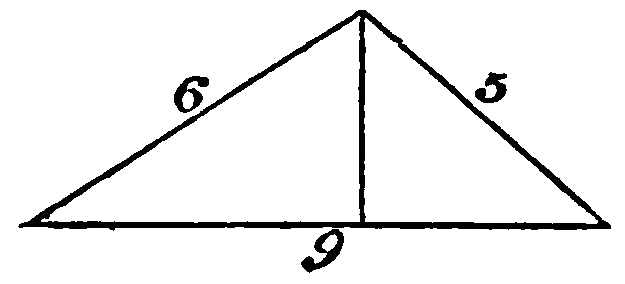

In [8]:
from IPython.display import Image, display, Audio, Markdown
import base64

IMAGE_PATH = "data/triangle.png"

# Preview image for context
display(Image(IMAGE_PATH))

#### Base64 Image Processing

In [9]:
# Open the image file and encode it as a base64 string
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image(IMAGE_PATH)

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework!"},
        {"role": "user", "content": [
            {"type": "text", "text": "What's the area of the triangle?"},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"}
            }
        ]}
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

To find the area of the triangle, we can use Heron's formula. First, we need to find the semi-perimeter \( s \) of the triangle.

The sides of the triangle are 6, 5, and 9.

The semi-perimeter \( s \) is given by:
\[ s = \frac{a + b + c}{2} \]
where \( a = 6 \), \( b = 5 \), and \( c = 9 \).

\[ s = \frac{6 + 5 + 9}{2} = \frac{20}{2} = 10 \]

Now, we can use Heron's formula to find the area \( A \):
\[ A = \sqrt{s(s-a)(s-b)(s-c)} \]

Substitute the values:
\[ A = \sqrt{10(10-6)(10-5)(10-9)} \]
\[ A = \sqrt{10 \cdot 4 \cdot 5 \cdot 1} \]
\[ A = \sqrt{200} \]
\[ A = 10\sqrt{2} \]

So, the area of the triangle is \( 10\sqrt{2} \) square units.


#### URL Image Processing

In [10]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework!"},
        {"role": "user", "content": [
            {"type": "text", "text": "What's the area of the triangle?"},
            {"type": "image_url", "image_url": {
                "url": "https://upload.wikimedia.org/wikipedia/commons/e/e2/The_Algebra_of_Mohammed_Ben_Musa_-_page_82b.png"}
            }
        ]}
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)

To find the area of the triangle, we can use Heron's formula. Heron's formula states that the area of a triangle with sides of lengths \(a\), \(b\), and \(c\) is:

\[ \text{Area} = \sqrt{s(s-a)(s-b)(s-c)} \]

where \(s\) is the semi-perimeter of the triangle:

\[ s = \frac{a + b + c}{2} \]

For the given triangle, the side lengths are \(a = 6\), \(b = 5\), and \(c = 9\).

First, calculate the semi-perimeter \(s\):

\[ s = \frac{6 + 5 + 9}{2} = \frac{20}{2} = 10 \]

Now, apply Heron's formula:

\[ \text{Area} = \sqrt{10(10-6)(10-5)(10-9)} \]
\[ \text{Area} = \sqrt{10 \cdot 4 \cdot 5 \cdot 1} \]
\[ \text{Area} = \sqrt{200} \]
\[ \text{Area} = 10\sqrt{2} \]

So, the area of the triangle is \(10\sqrt{2}\) square units.


## Video Processing
While it's not possible to directly send a video to the API, GPT-4o can understand videos if you sample frames and then provide them as images. It performs better at this task than GPT-4 Turbo.

Since GPT-4o in the API does not yet support audio-in (as of May 2024), we'll use a combination of GPT-4o and Whisper to process both the audio and visual for a provided video, and showcase two usecases:
1. Summarization
2. Question and Answering



### Setup for Video Processing
We'll use two python packages for video processing - opencv-python and moviepy. 

These require [ffmpeg](https://ffmpeg.org/about.html), so make sure to install this beforehand. Depending on your OS, you may need to run `brew install ffmpeg` or `sudo apt install ffmpeg`

In [11]:
# %pip install opencv-python --quiet
# %pip install moviepy --quiet

### Process the video into two components: frames and audio

In [12]:
import cv2
from moviepy.editor import VideoFileClip
import time
import base64

# We'll be using the OpenAI DevDay Keynote Recap video. You can review the video here: https://www.youtube.com/watch?v=h02ti0Bl6zk
VIDEO_PATH = "data/keynote_recap.mp4"

/Users/ibrahimsaidi/Desktop/Builds/Python_Builds/openai-devday/.venv/lib/python3.12/site-packages/moviepy/config_defaults.py:1: SyntaxWarning: invalid escape sequence '\P'
  """
/Users/ibrahimsaidi/Desktop/Builds/Python_Builds/openai-devday/.venv/lib/python3.12/site-packages/moviepy/video/io/ffmpeg_reader.py:294: SyntaxWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
/Users/ibrahimsaidi/Desktop/Builds/Python_Builds/openai-devday/.venv/lib/python3.12/site-packages/moviepy/video/io/ffmpeg_reader.py:367: SyntaxWarning: invalid escape sequence '\d'
  rotation_lines = [l for l in lines if 'rotate          :' in l and re.search('\d+$', l)]
/Users/ibrahimsaidi/Desktop/Builds/Python_Builds/openai-devday/.venv/lib/python3.12/site-packages/moviepy/video/io/ffmpeg_reader.py:370: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('\d+$', rotation_line)


In [13]:
def process_video(video_path, seconds_per_frame=2):
    base64Frames = []
    base_video_path, _ = os.path.splitext(video_path)

    video = cv2.VideoCapture(video_path)
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = video.get(cv2.CAP_PROP_FPS)
    frames_to_skip = int(fps * seconds_per_frame)
    curr_frame=0

    # Loop through the video and extract frames at specified sampling rate
    while curr_frame < total_frames - 1:
        video.set(cv2.CAP_PROP_POS_FRAMES, curr_frame)
        success, frame = video.read()
        if not success:
            break
        _, buffer = cv2.imencode(".jpg", frame)
        base64Frames.append(base64.b64encode(buffer).decode("utf-8"))
        curr_frame += frames_to_skip
    video.release()

    # Extract audio from video
    audio_path = f"{base_video_path}.mp3"
    clip = VideoFileClip(video_path)
    clip.audio.write_audiofile(audio_path, bitrate="32k")
    clip.audio.close()
    clip.close()

    print(f"Extracted {len(base64Frames)} frames")
    print(f"Extracted audio to {audio_path}")
    return base64Frames, audio_path

# Extract 1 frame per second. You can adjust the `seconds_per_frame` parameter to change the sampling rate
base64Frames, audio_path = process_video(VIDEO_PATH, seconds_per_frame=1)


MoviePy - Writing audio in data/keynote_recap.mp3


MoviePy - Done.
Extracted 218 frames
Extracted audio to data/keynote_recap.mp3


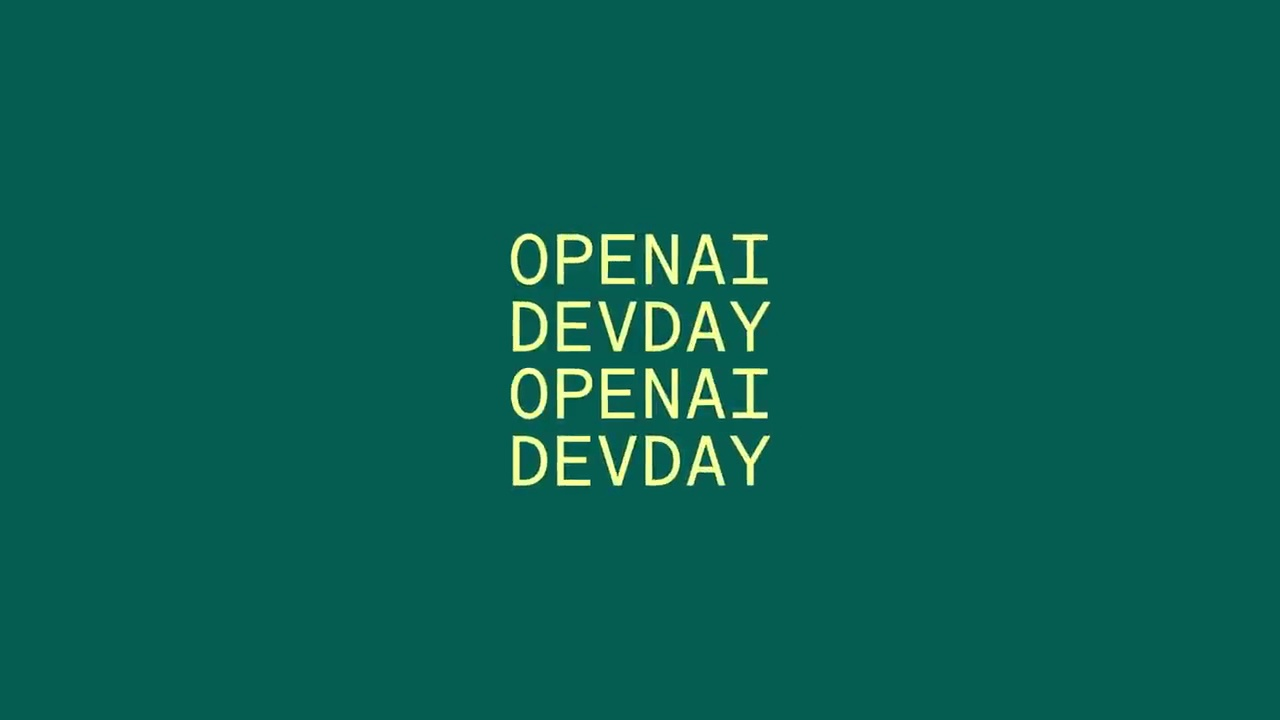

In [14]:
## Display the frames and audio for context
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8")), width=600))
    time.sleep(0.025)

Audio(audio_path)

### Example 1: Summarization
Now that we have both the video frames and the audio, let's run a few different tests to generate a video summary to compare the results of using the models with different modalities. We should expect to see that the summary generated with context from both visual and audio inputs will be the most accurate, as the model is able to use the entire context from the video.

1. Visual Summary
2. Audio Summary
3. Visual + Audio Summary

#### Visual Summary
The visual summary is generated by sending the model only the frames from the video. With just the frames, the model is likely to capture the visual aspects, but will miss any details discussed by the speaker.

In [15]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content": "You are generating a video summary. Please provide a summary of the video. Respond in Markdown."},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url", 
                        "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames)
        ],
    }
    ],
    temperature=0,
)
print(response.choices[0].message.content)

## Video Summary: OpenAI DevDay Keynote

### Introduction
- The video begins with the title "OpenAI DevDay" displayed on the screen.
- A "Keynote Recap" follows, indicating a summary of the main points discussed during the event.

### Event Overview
- The event takes place at a venue with a sign reading "OpenAI DevDay."
- Attendees are seen gathering and interacting in a large hall with a stage set up for presentations.

### Keynote Presentation
- The keynote speaker, standing in front of a large screen, introduces the event and the topics to be covered.
- The presentation covers several key announcements and updates from OpenAI.

### Major Announcements
1. **GPT-4 Turbo**:
   - Introduction of GPT-4 Turbo, an enhanced version of GPT-4.
   - Emphasis on improved performance and efficiency, with 3x less input tokens and 2x less output tokens.

2. **New Features**:
   - JSON Mode: A new feature allowing structured data output.
   - Function Calling: Enhanced capabilities for calling func

The results are as expected - the model is able to capture the high level aspects of the video visuals, but misses the details provided in the speech.

#### Audio Summary
The audio summary is generated by sending the model the audio transcript. With just the audio, the model is likely to bias towards the audio content, and will miss the context provided by the presentations and visuals.

`{audio}` input for GPT-4o isn't currently available but will be coming soon! For now, we use our existing `whisper-1` model to process the audio

In [16]:
# Transcribe the audio
transcription = client.audio.transcriptions.create(
    model="whisper-1",
    file=open(audio_path, "rb"),
)
## OPTIONAL: Uncomment the line below to print the transcription
print("Transcript: ", transcription.text + "\n\n")

response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""You are generating a transcript summary. Create a summary of the provided transcription. Respond in Markdown."""},
    {"role": "user", "content": [
        {"type": "text", "text": f"The audio transcription is: {transcription.text}"}
        ],
    }
    ],
    temperature=0,
)
print(response.choices[0].message.content)

Transcript:  Welcome to our first-ever OpenAI Dev Day. Today, we are launching a new model, GPT-4 Turbo. GPT-4 Turbo supports up to 128,000 tokens of context. We have a new feature called JSON mode, which ensures that the model will respond with valid JSON. You can now call many functions at once, and it'll do better at following instructions in general. You want these models to be able to access better knowledge about the world. So do we. So we're launching retrieval in the platform. You can bring knowledge from outside documents or databases into whatever you're building. GPT-4 Turbo has knowledge about the world up to April of 2023, and we will continue to improve that over time. Dolly 3, GPT-4 Turbo with Vision, and the new Text-to-Speech model are all going into the API today. Today, we're launching a new program called Custom Models. With Custom Models, our researchers will work closely with the company to help them make a great custom model, especially for them and their use cas

The audio summary is biased towards the content discussed during the speech, but comes out with much less structure than the video summary.

#### Audio + Visual Summary
The Audio + Visual summary is generated by sending the model both the visual and the audio from the video at once. When sending both of these, the model is expected to better summarize since it can perceive the entire video at once.

In [17]:
## Generate a summary with visual and audio
response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""You are generating a video summary. Create a summary of the provided video and its transcript. Respond in Markdown"""},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url", 
                        "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
        {"type": "text", "text": f"The audio transcription is: {transcription.text}"}
        ],
    }
],
    temperature=0,
)
print(response.choices[0].message.content)

## Video Summary: OpenAI Dev Day Keynote

### Introduction
- **Event**: OpenAI Dev Day
- **Speaker**: Unnamed presenter

### Key Announcements
1. **GPT-4 Turbo Launch**
   - New model: GPT-4 Turbo
   - Supports up to 128,000 tokens of context

2. **JSON Mode**
   - Ensures model responses with valid JSON
   - Improved function calling capabilities

3. **Retrieval Feature**
   - Allows integration of external knowledge from documents or databases

4. **Knowledge Update**
   - GPT-4 Turbo has knowledge up to April 2023
   - Continuous improvements planned

5. **API Updates**
   - Launch of DALL-E 3, GPT-4 Turbo with Vision, and new Text-to-Speech model
   - Introduction of Custom Models program for tailored solutions

6. **Higher Rate Limits**
   - Doubling tokens per minute for established GPT-4 customers
   - Ability to request changes to rate limits and quotas in API settings

7. **Cost Efficiency**
   - GPT-4 Turbo is 3x cheaper for prompt tokens and 2x cheaper for completion tokens 

After combining both the video and audio, we're able to get a much more detailed and comprehensive summary for the event which uses information from both the visual and audio elements from the video.

### Example 2: Question and Answering
For the Q&A, we'll use the same concept as before to ask questions of our processed video while running the same 3 tests to demonstrate the benefit of combining input modalities:
1. Visual Q&A
2. Audio Q&A
3. Visual + Audio Q&A 

In [18]:
QUESTION = "Question: Why did Sam Altman have an example about raising windows and turning the radio on?"

In [ ]:
qa_visual_response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content": "Use the video to answer the provided question. Respond in Markdown."},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url", "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
        QUESTION
        ],
    }
    ],
    temperature=0,
)
print("Visual QA:\n" + qa_visual_response.choices[0].message.content)

In [ ]:
qa_audio_response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""Use the transcription to answer the provided question. Respond in Markdown."""},
    {"role": "user", "content": f"The audio transcription is: {transcription.text}. \n\n {QUESTION}"},
    ],
    temperature=0,
)
print("Audio QA:\n" + qa_audio_response.choices[0].message.content)

In [ ]:
qa_both_response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""Use the video and transcription to answer the provided question."""},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url", 
                        "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
                        {"type": "text", "text": f"The audio transcription is: {transcription.text}"},
        QUESTION
        ],
    }
    ],
    temperature=0,
)
print("Both QA:\n" + qa_both_response.choices[0].message.content)

Comparing the three answers, the most accurate answer is generated by using both the audio and visual from the video. Sam Altman did not discuss the raising windows or radio on during the Keynote, but referenced an improved capability for the model to execute multiple functions in a single request while the examples were shown behind him.

## Conclusion
Integrating many input modalities such as audio, visual, and textual, significantly enhances the performance of the model on a diverse range of tasks. This multimodal approach allows for more comprehensive understanding and interaction, mirroring more closely how humans perceive and process information. 

Currently, GPT-4o in the API supports text and image inputs, with audio capabilities coming soon.